## Import libraries 

In [2]:
import pandas as pd 

In [3]:
data_path = ('CVD_dataset.csv')

In [4]:
data = pd.read_csv(data_path)
data.head()

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Heart_Disease
0,Poor,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,No
1,Very Good,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,Yes
2,Very Good,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,No
3,Poor,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,Yes
4,Good,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Exercise                      308854 non-null  object 
 2   Skin_Cancer                   308854 non-null  object 
 3   Other_Cancer                  308854 non-null  object 
 4   Depression                    308854 non-null  object 
 5   Diabetes                      308854 non-null  object 
 6   Arthritis                     308854 non-null  object 
 7   Sex                           308854 non-null  object 
 8   Age_Category                  308854 non-null  object 
 9   Height_(cm)                   308854 non-null  int64  
 10  Weight_(kg)                   308854 non-null  float64
 11  BMI                           308854 non-null  float64
 12  Smoking_History               308854 non-nul

In [6]:
data.isnull().sum() # finding is there any null data

General_Health                  0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
Heart_Disease                   0
dtype: int64

In [7]:
data.duplicated().sum() # finding is there any duplicate data

784

In [7]:
# data.nunique()

In [8]:
data_without_duplicates = data.drop_duplicates(keep='first') # delete duplicate values and keep the first one
data_without_duplicates.info() # new data info after merging duplicate data

<class 'pandas.core.frame.DataFrame'>
Index: 308070 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308070 non-null  object 
 1   Exercise                      308070 non-null  object 
 2   Skin_Cancer                   308070 non-null  object 
 3   Other_Cancer                  308070 non-null  object 
 4   Depression                    308070 non-null  object 
 5   Diabetes                      308070 non-null  object 
 6   Arthritis                     308070 non-null  object 
 7   Sex                           308070 non-null  object 
 8   Age_Category                  308070 non-null  object 
 9   Height_(cm)                   308070 non-null  int64  
 10  Weight_(kg)                   308070 non-null  float64
 11  BMI                           308070 non-null  float64
 12  Smoking_History               308070 non-null  ob

## Encoding using LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
# Label Encoding (where data are non neumerical and more than binary statement)

# categorical_columns = ['General_Health', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Sex', 'Age_Category', 'Diabetes', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Heart_Disease']
# for col in data_without_duplicates.columns:
#     data_without_duplicates[col] = encoder.fit_transform(data_without_duplicates[col])

col = data_without_duplicates.columns
# solved this problem: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
def encode_column(data_without_duplicates, col, encoder):
  data_without_duplicates.loc[:, col] = encoder.fit_transform(data_without_duplicates[col])

data_without_duplicates

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Heart_Disease
0,3,0,0,0,0,0,1,0,10,36,9,77,1,0,30,16,0
1,4,0,0,0,0,2,0,0,10,51,145,1226,0,0,30,0,1
2,4,1,0,0,0,2,0,0,8,49,180,1682,0,4,12,3,0
3,3,1,0,0,0,2,0,1,11,66,195,1267,0,0,30,30,1
4,2,0,0,0,0,0,0,1,12,77,180,868,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0,0,1,1,54,159,1295,0,4,30,8,0
308850,1,1,0,0,0,2,0,1,9,66,121,604,0,8,15,48,0
308851,4,1,0,0,1,3,0,0,2,43,94,898,1,4,40,8,0
308852,4,1,0,0,0,0,0,1,9,69,152,810,0,3,30,12,0


In [11]:
# from sklearn.preprocessing import OneHotEncoder
# oneHatencoder = OneHotEncoder(sparse=False)  # Set sparse=False for easier handling

In [12]:
# categorical_columns = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Heart_Disease']
# data_without_duplicates = pd.get_dummies(data_without_duplicates, columns=categorical_columns)
# data_without_duplicates

In [13]:
data_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308070 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   General_Health                308070 non-null  int32
 1   Exercise                      308070 non-null  int32
 2   Skin_Cancer                   308070 non-null  int32
 3   Other_Cancer                  308070 non-null  int32
 4   Depression                    308070 non-null  int32
 5   Diabetes                      308070 non-null  int32
 6   Arthritis                     308070 non-null  int32
 7   Sex                           308070 non-null  int32
 8   Age_Category                  308070 non-null  int32
 9   Height_(cm)                   308070 non-null  int64
 10  Weight_(kg)                   308070 non-null  int64
 11  BMI                           308070 non-null  int64
 12  Smoking_History               308070 non-null  int32
 13  Alcohol_Consumption

In [16]:
# copied the actual data into data_count so that if i replace the encoded values that doesn't effect the actual data frame
data_count = data_without_duplicates.copy()

In [17]:
import matplotlib.pyplot as plt

## Counting how many male and female in the dataset

In [18]:
data_count['Sex'] = data_count['Sex'].replace({
    0 : "Femlae", 1 : "Male"
})

gender_count = data_count['Sex'].value_counts()
print('Number of Total Female and Male')
gender_count

Number of Total Female and Male


Sex
Femlae    159738
Male      148332
Name: count, dtype: int64

In [17]:
# gender_disease_groups = data_without_duplicates.groupby(['Sex', 'Heart_Disease']).size().unstack()

In [18]:
# gender_disease_groups.plot(kind='bar', stacked=False)
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.title('Heart Disease Status by Gender')
# plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
# plt.xticks(rotation=0)  # Rotate x-labels if needed
# plt.show()

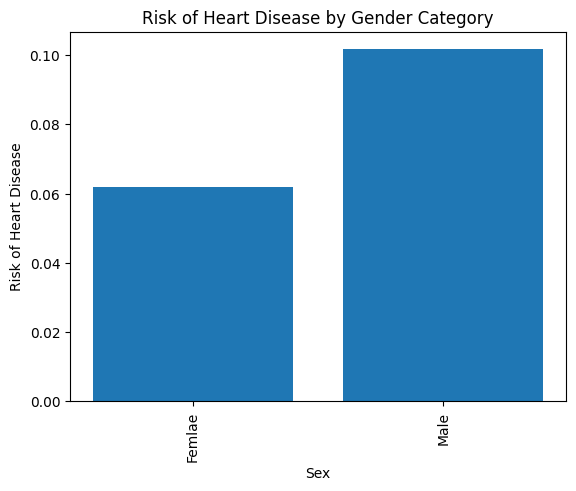

In [19]:
gender_group = data_without_duplicates.groupby('Sex')
risk_by_gender = gender_group['Heart_Disease'].mean()
gender_group_names = {
   0 : "Femlae", 1 : "Male"
}
plt.bar(gender_group_names.values(), risk_by_gender.values)
plt.xlabel('Sex')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Gender Category')
plt.xticks(rotation=90)
plt.show()

## The chances of having heart diseases of differnt age category

In [22]:
data_count['Age_Category'] = data_count['Age_Category'].replace({
     0: "18 to 24",
    1: "25 to 29",
    2: "30 to 34",
    3: "35 to 39",
    4: "40 to 44",
    5: "45 to 49",
    6: "50 to 54",
    7: "55 to 59",
    8: "60 to 64",
    9: "65 to 69",
    10: "70 to 74",
    11: "75 to 79",
    12: "80 or older"
})
age_count = data_count['Age_Category'].value_counts().sort_values()
print('Number of People According to their Age (Sorted)')
age_count

Number of People According to their Age (Sorted)


Age_Category
25 to 29       15456
30 to 34       18359
18 to 24       18570
35 to 39       20554
75 to 79       20676
45 to 49       20903
40 to 44       21532
80 or older    22227
50 to 54       25024
55 to 59       28000
70 to 74       31063
60 to 64       32350
65 to 69       33356
Name: count, dtype: int64

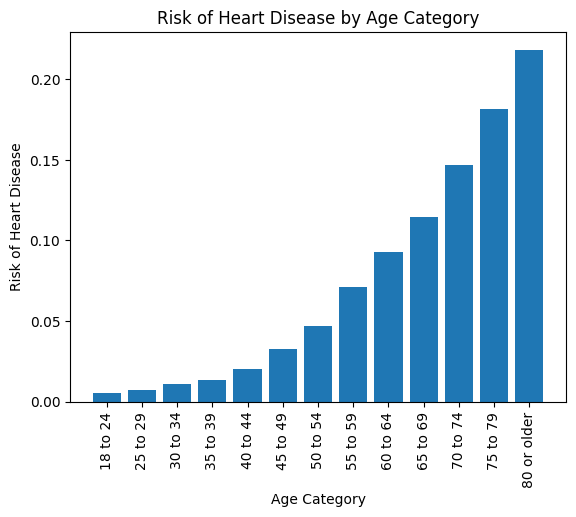

In [24]:
age_group = data_without_duplicates.groupby('Age_Category')
risk_by_age = age_group['Heart_Disease'].mean()
age_group_names = {
    0: "18 to 24",
    1: "25 to 29",
    2: "30 to 34",
    3: "35 to 39",
    4: "40 to 44",
    5: "45 to 49",
    6: "50 to 54",
    7: "55 to 59",
    8: "60 to 64",
    9: "65 to 69",
    10: "70 to 74",
    11: "75 to 79",
    12: "80 or older",
}
plt.bar(age_group_names.values(), risk_by_age.values)
plt.xlabel('Age Category')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Age Category')
plt.xticks(rotation=90)
plt.show()

## The chances of having heart diseases of differnt General Health

In [25]:
data_count['General_Health'] = data_count['General_Health'].replace({
    0: "Excellent",
    1: "Very good",
    2: "Good",
    3: "Fair",
    4: "Poor"
})

general_health_count = data_count['General_Health'].value_counts().sort_values()
print('Number of People According to their General Health (Sorted)')
general_health_count

Number of People According to their General Health (Sorted)


General_Health
Fair          11331
Very good     35800
Excellent     55710
Good          95226
Poor         110003
Name: count, dtype: int64

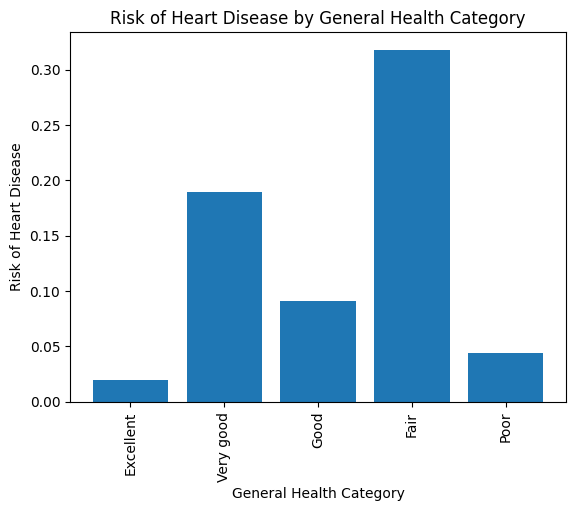

In [26]:
general_health_group = data_without_duplicates.groupby('General_Health')
risk_by_general_health = general_health_group['Heart_Disease'].mean()
general_health_group_names = {
    0: "Excellent",
    1: "Very good",
    2: "Good",
    3: "Fair",
    4: "Poor"
}
plt.bar(general_health_group_names.values(), risk_by_general_health.values)
plt.xlabel('General Health Category')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by General Health Category')
plt.xticks(rotation=90)
plt.show()


## The chances of having heart diseases according to their Excercise routine

In [27]:
data_count['Exercise'] = data_count['Exercise'].replace({
    0: "No",
    1: "Yes"
})

excercise_count = data_count['Exercise'].value_counts().sort_values()
print('Number of People According to their Excercise (Sorted)')
excercise_count

Number of People According to their Excercise (Sorted)


Exercise
No      69427
Yes    238643
Name: count, dtype: int64

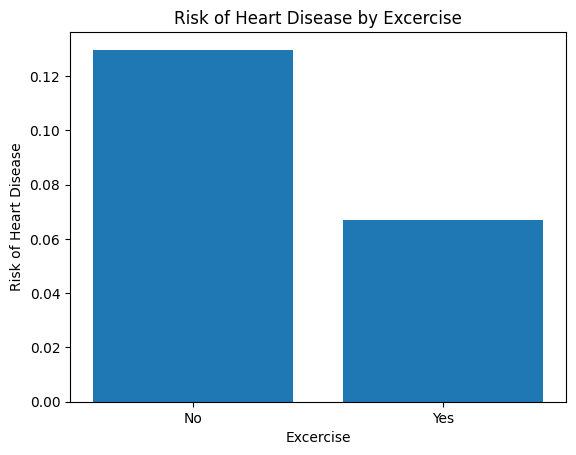

In [28]:
excercise_group = data_without_duplicates.groupby('Exercise')
risk_by_excercise = excercise_group['Heart_Disease'].mean()
excercise_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(excercise_group_names.values(), risk_by_excercise.values)
plt.xlabel('Excercise')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Excercise')
plt.xticks(rotation=0)
plt.show()


## The chances of having heart diseases according to their Skin Cancer

In [29]:
data_count['Skin_Cancer'] = data_count['Skin_Cancer'].replace({
    0: "No",
    1: "Yes"
})

skin_cancer_count = data_count['Skin_Cancer'].value_counts().sort_values()
print('Number of People According to their Skin_Cancer (Sorted)')
skin_cancer_count

Number of People According to their Skin_Cancer (Sorted)


Skin_Cancer
Yes     29982
No     278088
Name: count, dtype: int64

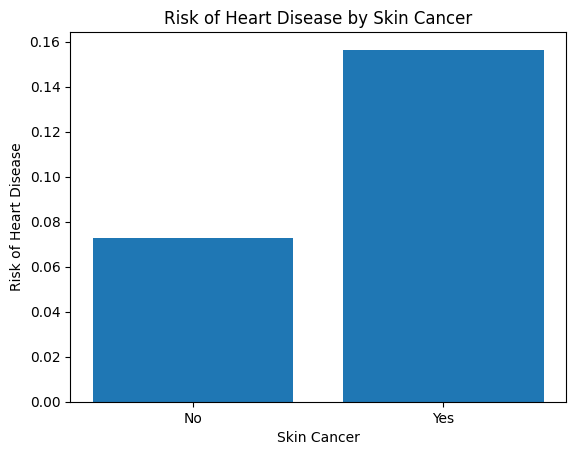

In [30]:
skin_cancer_group = data_without_duplicates.groupby('Skin_Cancer')
risk_by_skin_cancer = skin_cancer_group['Heart_Disease'].mean()
skin_cancer_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(skin_cancer_group_names.values(), risk_by_skin_cancer.values)
plt.xlabel('Skin Cancer')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Skin Cancer')
plt.xticks(rotation=0)
plt.show()


## The chances of having heart diseases if they have Depression

In [31]:
data_count['Depression'] = data_count['Depression'].replace({
    0: "No",
    1 : 'Yes'
})

depression_count = data_count['Depression'].value_counts().sort_values()
print('Number of People According to their Depression (Sorted)')
depression_count

Number of People According to their Depression (Sorted)


Depression
Yes     61884
No     246186
Name: count, dtype: int64

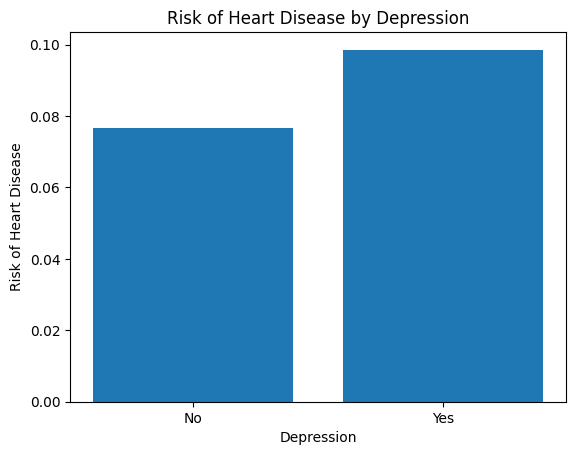

In [32]:
depression_group = data_without_duplicates.groupby('Depression')
risk_by_depression = depression_group['Heart_Disease'].mean()

depression_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(depression_group_names.values(), risk_by_depression.values)
plt.xlabel('Depression')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Depression')
plt.xticks(rotation=0)
plt.show()

## The chances of having heart diseases according to their Smoking History

In [33]:
data_count['Smoking_History'] = data_count['Smoking_History'].replace({
     0: "No",
    1: "Yes"
})

smoking_count = data_count['Smoking_History'].value_counts().sort_values()
print('Number of People According to their Smoking_History (Sorted)')
smoking_count

Number of People According to their Smoking_History (Sorted)


Smoking_History
Yes    125158
No     182912
Name: count, dtype: int64

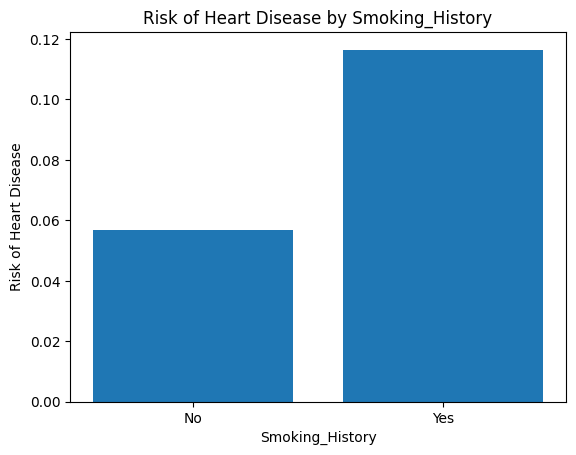

In [34]:
smoking_group = data_without_duplicates.groupby('Smoking_History')
risk_by_smoking = smoking_group['Heart_Disease'].mean()

smoking_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(smoking_group_names.values(), risk_by_smoking.values)
plt.xlabel('Smoking_History')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Smoking_History')
plt.xticks(rotation=0)
plt.show()

## The chances of having heart diseases according to their Diabetes

In [35]:
data_count['Diabetes'] = data_count['Diabetes'].replace({
     0: "No",
     1: "No, pre-diabetes or borderline diabetes",
     2: "Yes",
     3: "Yes, but female told only during pregnancy"
})

diabetes_count = data_count['Diabetes'].value_counts().sort_values()
print('Number of People According to their Diabetes (Sorted)')
diabetes_count

Number of People According to their Diabetes (Sorted)


Diabetes
Yes, but female told only during pregnancy      2646
No, pre-diabetes or borderline diabetes         6896
Yes                                            40160
No                                            258368
Name: count, dtype: int64

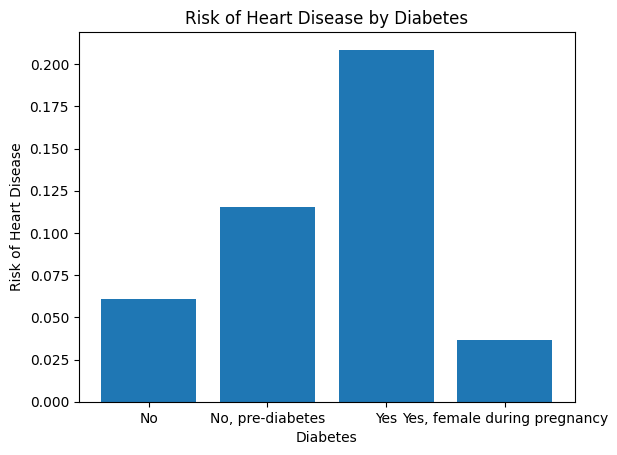

In [36]:
diabetes_group = data_without_duplicates.groupby('Diabetes')
risk_by_diabetes = diabetes_group['Heart_Disease'].mean()

diabetes_group_names = {
    0: "No",
     1: "No, pre-diabetes", # No, pre-diabetes or borderline diabetes AS No, pre-diabetes
     2: "Yes",
     3: "Yes, female during pregnancy" # Yes, but female told only during pregnancy AS Yes, female during pregnancy
}
plt.bar(diabetes_group_names.values(), risk_by_diabetes.values)
plt.xlabel('Diabetes')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Diabetes')
plt.xticks(rotation=0)
plt.show()

In [37]:
data_without_duplicates.columns

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'Heart_Disease'],
      dtype='object')

## Feature Scaling using StandardScaler

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [39]:
X = data_without_duplicates.drop('Heart_Disease', axis=1) # use all features except target column
y = data_without_duplicates['Heart_Disease'] # target data

In [40]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [135]:
# !pip install scikeras

## Feedforward Neural Network (FNN) or a Multi-Layer Perceptron (MLP) Model Evaluation

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [72]:
X_train_scaled.shape

(246456, 16)

In [73]:
# function to create the model
def create_model(dropout_rate=0.5):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [74]:
# Hyperparameter tuning with cross-validation
model = KerasClassifier(build_fn=create_model, verbose=2, dropout_rate=0.5)
param_dist = {
    'batch_size': [64],
    'epochs': [50],
    # 'dropout_rate': [0.3, 0.5, 0.7]
}

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [76]:
# def keras_wrapper(dropout_rate=0.5):
#     return KerasClassifier(build_fn=lambda: create_model(dropout_rate), verbose=0)

# random_search = RandomizedSearchCV(estimator=keras_wrapper(), param_distributions=param_dist, n_iter=10, cv=10, scoring='accuracy', n_jobs=-1)
# random_result = random_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_result = random_search.fit(X_train_scaled, y_train)

C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3851/3851 - 8s - 2ms/step - accuracy: 0.9174 - loss: 0.2533
Epoch 2/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9186 - loss: 0.2381
Epoch 3/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9185 - loss: 0.2354
Epoch 4/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9186 - loss: 0.2348
Epoch 5/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9184 - loss: 0.2339
Epoch 6/50
3851/3851 - 6s - 2ms/step - accuracy: 0.9185 - loss: 0.2337
Epoch 7/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9183 - loss: 0.2338
Epoch 8/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9183 - loss: 0.2332
Epoch 9/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9184 - loss: 0.2331
Epoch 10/50
3851/3851 - 8s - 2ms/step - accuracy: 0.9183 - loss: 0.2327
Epoch 11/50
3851/3851 - 8s - 2ms/step - accuracy: 0.9183 - loss: 0.2324
Epoch 12/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9183 - loss: 0.2323
Epoch 13/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9183 - loss: 0.2321
Epoch 14/50
3851/3851 - 7s - 2ms/step - accuracy: 0.9184 - loss: 0.2322
E

In [87]:
X_test_scaled = scaler.transform(X_test)

In [88]:
y_pred = random_result.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

963/963 - 1s - 810us/step
Accuracy: 91.99%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56680
           1       0.00      0.00      0.00      4934

    accuracy                           0.92     61614
   macro avg       0.46      0.50      0.48     61614
weighted avg       0.85      0.92      0.88     61614



C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Recurrent Neural Network (RNN) or Long Short-Term Memory (LSTM) Model Evaluation

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [105]:
def create_rnn_model(dropout_rate=0.5):
    model = Sequential([
        SimpleRNN(128, activation='relu', input_shape=(X_train_scaled_rnn.shape[1], 1)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [106]:
# Create a KerasClassifier
rnn_model = KerasClassifier(build_fn=create_rnn_model, verbose=2, dropout_rate=0.5)

In [107]:
param_dist = {
    'batch_size': [64],
    'epochs': [50],
    # 'dropout_rate': [0.3, 0.5, 0.7]
}

In [108]:
random_search = RandomizedSearchCV(estimator=rnn_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Epoch 1/50


C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3851/3851 - 19s - 5ms/step - accuracy: 0.9177 - loss: 0.2572
Epoch 2/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9185 - loss: 0.2377
Epoch 3/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9185 - loss: 0.2346
Epoch 4/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9184 - loss: 0.2337
Epoch 5/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9183 - loss: 0.2326
Epoch 6/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9183 - loss: 0.2316
Epoch 7/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9183 - loss: 0.2315
Epoch 8/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9183 - loss: 0.2316
Epoch 9/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9184 - loss: 0.2305
Epoch 10/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9185 - loss: 0.2305
Epoch 11/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9184 - loss: 0.2305
Epoch 12/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9183 - loss: 0.2304
Epoch 13/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9186 - loss: 0.2303
Epoch 14/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9182 - loss: 0.230

RandomizedSearchCV(cv=5,
                   estimator=KerasClassifier(build_fn=<function create_rnn_model at 0x0000024790596840>, dropout_rate=0.5, verbose=2),
                   n_jobs=-1,
                   param_distributions={'batch_size': [64], 'epochs': [50]},
                   scoring='accuracy')

In [110]:
# y_pred_rnn = random_search.predict(X_test_scaled)
# accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
# print("Accuracy: {:.2f}%".format(accuracy_rnn * 100))
# print("Classification Report:")
# print(classification_report(y_test, y_pred_rnn))

accuracy_rnn = random_search.best_score_
print("Best accuracy found:", accuracy_rnn)

Best accuracy found: 0.9187157139886863


In [116]:
# Measure accuracy on a separate test set
test_accuracy_rnn = random_search.best_estimator_.score(X_test_scaled, y_test)
print("Accuracy on test set:", test_accuracy_rnn)
y_pred_rnn = random_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rnn))

963/963 - 2s - 2ms/step
Accuracy on test set: 0.9200344077644691
963/963 - 2s - 2ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56680
           1       0.63      0.00      0.01      4934

    accuracy                           0.92     61614
   macro avg       0.77      0.50      0.48     61614
weighted avg       0.90      0.92      0.88     61614



In [113]:
# Train the final model with the best hyperparameters
best_model = random_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Measure accuracy on the test set
test_accuracy = best_model.score(X_test_scaled, y_test)
print("Final accuracy on test set:", test_accuracy)

Epoch 1/50


C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\saons\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3851/3851 - 16s - 4ms/step - accuracy: 0.9179 - loss: 0.2574
Epoch 2/50
3851/3851 - 16s - 4ms/step - accuracy: 0.9187 - loss: 0.2391
Epoch 3/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9186 - loss: 0.2355
Epoch 4/50
3851/3851 - 18s - 5ms/step - accuracy: 0.9184 - loss: 0.2341
Epoch 5/50
3851/3851 - 18s - 5ms/step - accuracy: 0.9185 - loss: 0.2328
Epoch 6/50
3851/3851 - 18s - 5ms/step - accuracy: 0.9182 - loss: 0.2327
Epoch 7/50
3851/3851 - 18s - 5ms/step - accuracy: 0.9184 - loss: 0.2326
Epoch 8/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9185 - loss: 0.2317
Epoch 9/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9186 - loss: 0.2317
Epoch 10/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9184 - loss: 0.2309
Epoch 11/50
3851/3851 - 17s - 4ms/step - accuracy: 0.9186 - loss: 0.2309
Epoch 12/50
3851/3851 - 18s - 5ms/step - accuracy: 0.9185 - loss: 0.2309
Epoch 13/50
3851/3851 - 18s - 5ms/step - accuracy: 0.9186 - loss: 0.2308
Epoch 14/50
3851/3851 - 18s - 5ms/step - accuracy: 0.9186 - loss: 0.230

In [115]:
# Measure accuracy on the test set
test_accuracy = best_model.score(X_test_scaled, y_test)
print("Final accuracy on test set:", test_accuracy*100)

963/963 - 2s - 2ms/step
Final accuracy on test set: 92.00344077644691


## CatBoosting Model Evaluation

In [118]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [119]:
# Define the hyperparameter space
param_dist = {
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'depth': randint(3, 10),  # Depth of the trees
    'l2_leaf_reg': uniform(0.1, 10),  # L2 regularization coefficient
    'iterations': [100, 200, 300],  # Number of boosting iterations
}

In [120]:
# Initialize the CatBoost classifier
catboost_clf = CatBoostClassifier(random_state=42, verbose=2)

In [121]:
random_search = RandomizedSearchCV(estimator=catboost_clf, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train, cat_features=None, verbose=2)

0:	learn: 0.5359155	total: 161ms	remaining: 15.9s
2:	learn: 0.3786301	total: 212ms	remaining: 6.86s
4:	learn: 0.3041789	total: 263ms	remaining: 5s
6:	learn: 0.2657994	total: 311ms	remaining: 4.13s
8:	learn: 0.2453184	total: 363ms	remaining: 3.67s
10:	learn: 0.2349418	total: 420ms	remaining: 3.4s
12:	learn: 0.2284328	total: 473ms	remaining: 3.17s
14:	learn: 0.2247432	total: 523ms	remaining: 2.96s
16:	learn: 0.2223109	total: 581ms	remaining: 2.84s
18:	learn: 0.2209553	total: 632ms	remaining: 2.69s
20:	learn: 0.2199998	total: 685ms	remaining: 2.58s
22:	learn: 0.2192088	total: 733ms	remaining: 2.45s
24:	learn: 0.2185180	total: 781ms	remaining: 2.34s
26:	learn: 0.2176952	total: 850ms	remaining: 2.3s
28:	learn: 0.2172939	total: 908ms	remaining: 2.22s
30:	learn: 0.2168995	total: 991ms	remaining: 2.21s
32:	learn: 0.2165592	total: 1.06s	remaining: 2.14s
34:	learn: 0.2161895	total: 1.13s	remaining: 2.09s
36:	learn: 0.2158647	total: 1.18s	remaining: 2.02s
38:	learn: 0.2155160	total: 1.23s	remaini

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002479A2AB590>,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024794E4FE00>,
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002479349FD70>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024795F54530>},
                   random_state=42, scoring='accuracy')

In [122]:
best_catboost_clf = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 6.1111501174320875, 'learning_rate': 0.22242177333881366}


In [125]:
y_pred_catboost = best_catboost_clf.predict(X_test_scaled)

In [127]:
accuracy_catboosting = accuracy_score(y_test, y_pred_catboost)
print("Accuracy: {:.2f}%".format(accuracy_catboosting * 100))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

Accuracy: 92.02%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56680
           1       0.52      0.04      0.07      4934

    accuracy                           0.92     61614
   macro avg       0.72      0.52      0.51     61614
weighted avg       0.89      0.92      0.89     61614



## XGBoost Model Evaluation

In [128]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [129]:
param_dist = {
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': randint(3, 10),  # Maximum depth of a tree
    'min_child_weight': uniform(1, 10),  # Minimum sum of instance weight needed in a child
    'subsample': uniform(0.6, 0.4),  # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.6, 0.4),  # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 0.5),  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': uniform(0, 10),  # L1 regularization term on weights
    'reg_lambda': uniform(0, 10),  # L2 regularization term on weights
    'n_estimators': [100, 200, 300]  # Number of boosting rounds
}

In [130]:
xgb_clf = XGBClassifier(random_state=42, verbosity=2)

In [131]:
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train, verbose=2)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024792E09E80>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024792E0AD20>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024792E0ABD0>},
                   random_state=42, scoring='accuracy')

In [132]:
best_xgb_clf = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'colsample_bytree': 0.7425191352307899, 'gamma': 0.453414220772877, 'learning_rate': 0.09163967481539059, 'max_depth': 5, 'min_child_weight': 5.271077886262563, 'n_estimators': 100, 'reg_alpha': 8.607305832563434, 'reg_lambda': 0.06952130531190703, 'subsample': 0.8042989210310263}


In [133]:
y_pred_xgb = best_xgb_clf.predict(X_test_scaled)

In [134]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: {:.2f}%".format(accuracy_xgb * 100))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 92.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56680
           1       0.51      0.03      0.06      4934

    accuracy                           0.92     61614
   macro avg       0.72      0.52      0.51     61614
weighted avg       0.89      0.92      0.89     61614

